# ZOMATO [DATA ANALYSIS PROJECT]

### Questions we need to solve
#### 1) What type of restaurant do the majority of customers order from?
#### 2 How many votes has each type of restaurant received from customers?
#### 3) What are the ratings that the majority of restaurants have received?
#### 4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?
#### 5) Which mode (online or offline) has received the maximum rating?
#### 6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

#### Import section

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import plotly.graph_objects as go

#### Load Dataset

In [5]:
dataframe = pd.read_csv("Zomato data .csv")
# print DataFrame
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#### Data Cleaning

In [36]:
def handleRate(value):
    dummy = str(value).split('/')
    newRate = float(dummy[0])
    return newRate

dataframe['rate'] = dataframe['rate'].apply(handleRate)
# After update rate attr
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [39]:
# checking dataframe information
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Ques 1: What type of restaurant do the majority of customers order from?

In [40]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


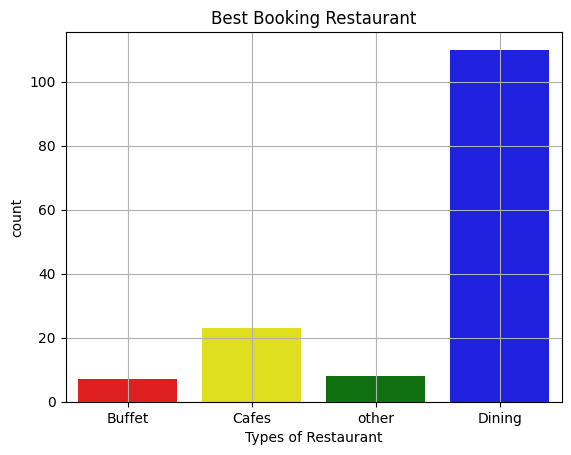

In [54]:
# Define color palette
color = ["red", "yellow", "green", "blue"]

# Create countplot with hue assigned to x and legend disabled
sns.countplot(x=dataframe['listed_in(type)'], hue=dataframe['listed_in(type)'], palette=color, legend=False)

# Add title and labels
plt.title("Best Booking Restaurant")
plt.xlabel("Types of Restaurant")
plt.grid()
# Show the plot
plt.show()

## Conclusion: Majority of the customers order from dining resaurent

## Ques 2: How many votes has each type of restaurant received from customers?

In [58]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


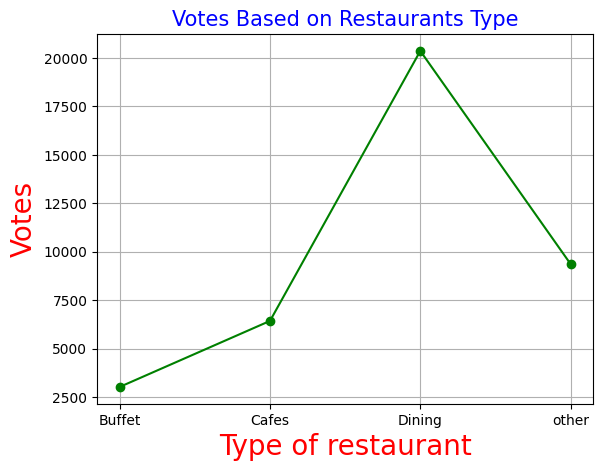

In [243]:
grougrouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({"Votes": grougrouped_data})
plt.plot(result, c="green", marker="o")
plt.title("Votes Based on Restaurants Type", c="blue", size=15)
plt.grid()
plt.xlabel("Type of restaurant", c='red', size=20)
plt.ylabel("Votes", c="red", size=20)
plt.show()

## Colclusion: Dinning Resaurents has Recieved Maxium Votes

## Q3: What are the ratings that the majority of restaurants have received?

In [83]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


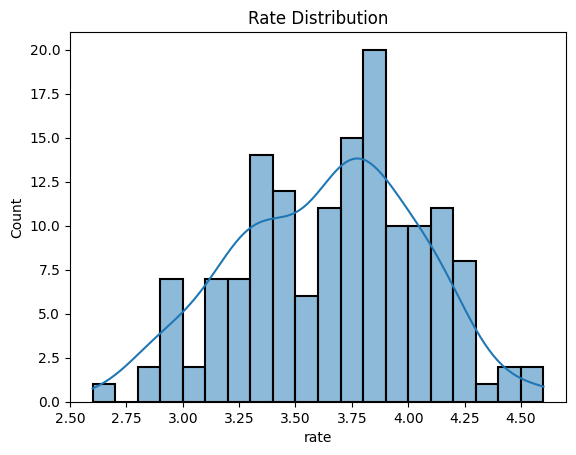

In [135]:
sns.histplot(
    x="rate", data=dataframe, edgecolor="black", linewidth=1.5, kde=True, bins=20)
plt.title("Rate Distribution")
plt.show()

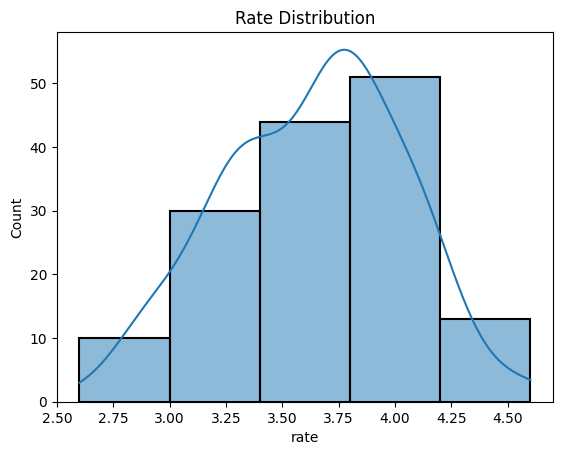

In [136]:
sns.histplot(
    x="rate", data=dataframe, edgecolor="black", linewidth=1.5, kde=True, bins=5)
plt.title("Rate Distribution")
plt.show()

### conclusion: as per observasion majority of the resaurents has rating which lies between (3.25 to 3.50) (3.65 to 4.1) both are exclusive

## Q4: Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [134]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


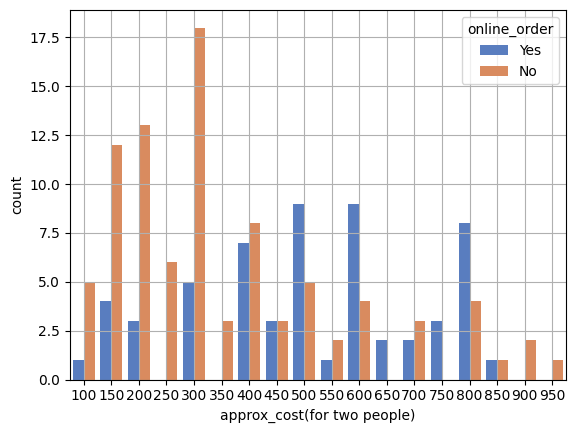

In [159]:
couple_data = sns.countplot(x="approx_cost(for two people)", data=dataframe, hue="online_order", 
                            palette="muted")
plt.grid(True)
plt.show()

### Insight 1: couple has spend more money in offline rather than online

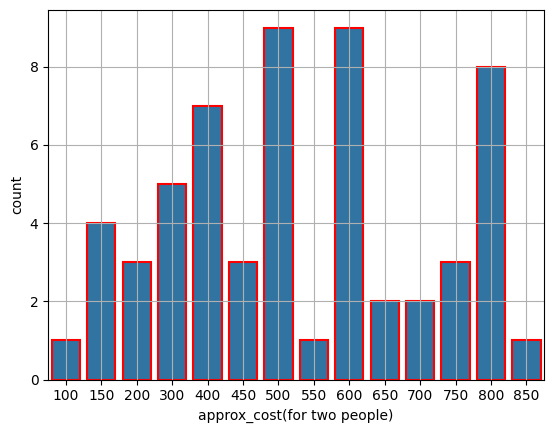

In [169]:
coupleWhoOrderFromOnline = dataframe[dataframe["online_order"] == "Yes"]
sns.countplot(x="approx_cost(for two people)", data=coupleWhoOrderFromOnline, linewidth=1.5, edgecolor="red")
plt.grid(True)
plt.show()

### Insight 2: maxi spend money by customers from: (450 to 650)

In [173]:
coupleWhoOrderFromOnline.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes


In [181]:
# Calculate Average spend by customer who are couple and order from online
from math import ceil
coupleWhoOrderFromOnline = dataframe[dataframe["online_order"] == "Yes"]
avg_spend_cost = coupleWhoOrderFromOnline["approx_cost(for two people)"].mean()
print("Avg spend is: ", ceil(avg_spend_cost))

Avg spend is:  511


### insight 3: Average spend by customers who are couple and order from online: 511

### Q5: Which mode (online or offline) has received the maximum rating?

In [183]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


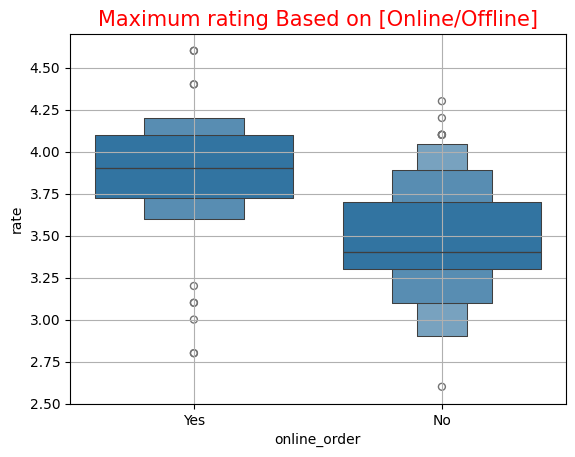

In [209]:
sns.boxenplot(x="online_order", y="rate", data=dataframe)
plt.title("Maximum rating Based on [Online/Offline]", size=15, color="red")
plt.grid()
plt.show()

### conclusion-1: online mode has received the maximum rating 
### conclusion-2: in offline maximum customers gives below feedback than online try to improve quality standards in resaurent  as maximum rating in online near to 4.25 to 3.75 where in offline is 3.50 to 3.25

### Q6: Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [ ]:
# observation: we know we have 4 types of resaurent [Buffet, Dining, Caffes, Others]
# and customer can order in 2 types [online/offline]

In [213]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


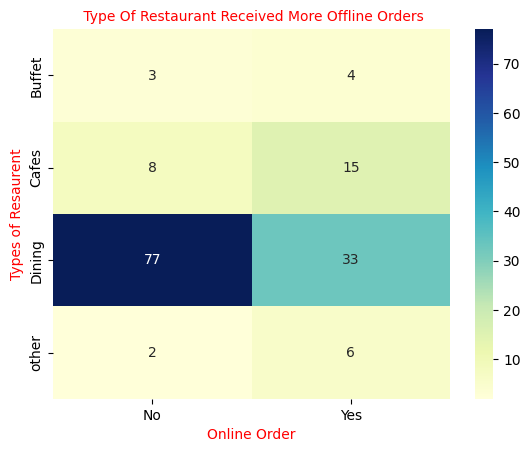

In [273]:
pivot_table = dataframe.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
# pivot_table
sns.heatmap(pivot_table, annot=True, fmt='d' , cmap="YlGnBu")
plt.title(" Type Of Restaurant Received More Offline Orders", size=10, color="red")
plt.xlabel("Online Order", color="red")
plt.ylabel("Types of Resaurent", color="red")
# plt.grid()
plt.show()

## CONCLUSION:
### Dining rest primarily accept offline orders.. Whers cafe mode rest primarily accept online mode 
### This suggest customer prefer to place order in person at rest. but prefer online mode types cafes as well

### Created By Arijit Chowdhury
#### Software Engineer and DS & ML 

# THANK YOU